# Pymaceuticals Inc.
---

### Analysis

# Per the provided data and the analysis performed; we observed that there is a strong correlation between the mouse weight and the tumor volume.  Indeed, per the data, the correlation between mouse weight and tumor volume is 0.84.  Additionally, the boxplot shows that the Capomulin Regimen is the most effective drug to cure the tumor volume.  
 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner" )

# Display the data table for preview
merged_df.head()
# merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [89]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [90]:
# merged_df.all()
# merged_df.loc[:,merged_df.all()]
# Timepoint columns has NA or Null
# merged_df.isna()
# merged_df.isnull()

In [91]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# merged_df["Mouse ID"].unique()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice
#drop()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
duplicate_mouse_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
cleaned_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
df_wo_dups = cleaned_df[cleaned_df["Mouse ID"]!="g989"]  # not equal to
df_wo_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [95]:
#df_wo_dups["Mouse ID"]=="g989".

In [96]:
#cleaned_df1 = df_wo_dups.copy
#cleaned_df1 = pd.DataFrame(cleaned_df1)
#cleaned_df1

In [97]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean_df = df_wo_dups["Mouse ID"].nunique()
print(f"The updated number of unique mice IDs is: {number_of_mice_clean_df}")


The updated number of unique mice IDs is: 248


In [98]:
#number_of_mice_clean_df

## Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
variance = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
std = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stat_df = pd.DataFrame({"Mean Tumor Volume":mean,
                                "Median Tumor Volume":median,
                                "Variance Tumor Volume":variance,
                                "Tumor Vol Standard Dev":std,
                                "Tumor Volume SEM":sem})
summary_stat_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Vol Standard Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

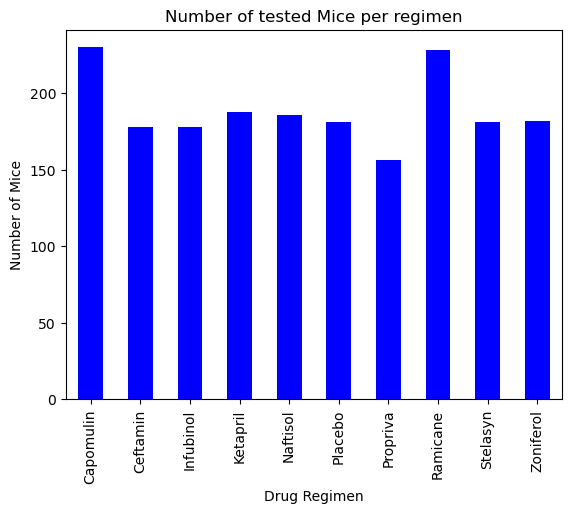

In [140]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

combined_data = cleaned_df.groupby('Drug Regimen').count()['Mouse ID']
plot_pandas = combined_data.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of tested Mice per regimen")
plt.savefig('bar')
plt.show()

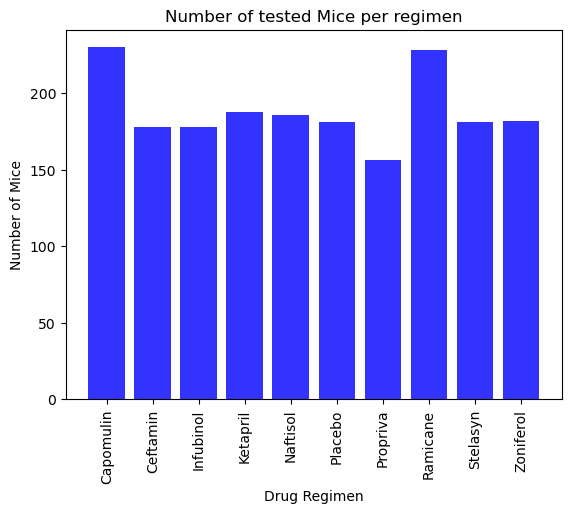

In [141]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = combined_data.index.values
y_axis = combined_data.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of tested Mice per regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.savefig('bar')

plt.show()


In [103]:
#cleaned_df

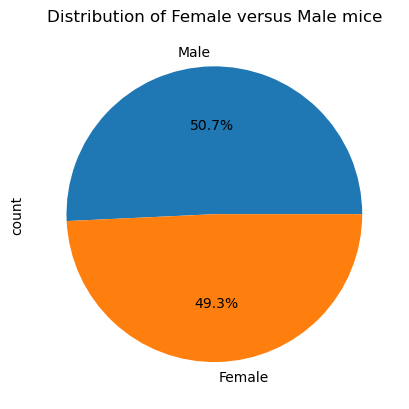

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = cleaned_df["Sex"].value_counts()
#gender_dist
plt.title("Distribution of Female versus Male mice")
gender_dist.plot.pie(autopct= "%1.1f%%")
plt.savefig('pie')
plt.show()


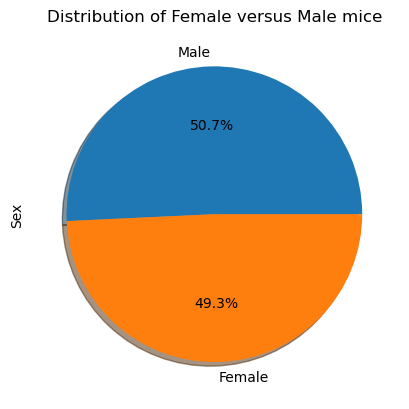

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x=gender_dist, labels=gender_dist.keys(), autopct="%1.1f%%", shadow=True, startangle=360)
plt.title("Distribution of Female versus Male mice")
#plt.figure(figsize=(5,5))
#plt.axis("equal")
plt.ylabel("Sex")
plt.savefig('pie2')
plt.show()



## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# 1) Capomulin: 
Capomulin_greatest = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_volume = pd.DataFrame(Capomulin_greatest)
Capomulin_merge = pd.merge(Capomulin_volume, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head(5)




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [107]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
quartiles = Capomulin_tumors.quantile([0.25, 0.50, 0.75])
q1 = quartiles[0.25]
q2 = quartiles[0.50]    # >>> Median 
q3 = quartiles[.75] 
iqr = q3 - q1 
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f"The lower quartile of Capomulin tumors: {q1}")
print(f"The upper quartile of Capomulin tumors: {q3}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"Values < {lower_bound} are potential outliers.")
print(f"Values > {upper_bound} are potential outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
Values < 20.70456164999999 are potential outliers.
Values > 51.83201549 are potential outliers.


In [108]:
# 2_Ramicane
Ramicane_greatest = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_volume = pd.DataFrame(Ramicane_greatest)
Ramicane_merge = pd.merge(Ramicane_volume, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [109]:
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles = Ramicane_tumors.quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q2 = quartiles[0.50]    # >>> Median 
q3 = quartiles[.75] 
iqr = q3 - q1 
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f"The lower quartile of Ramicane tumors: {q1}")
print(f"The upper quartile of Ramicane tumors: {q3}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"Values < {lower_bound} are potential outliers.")
print(f"Values > {upper_bound} are potential outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
Values < 17.912664470000003 are potential outliers.
Values > 54.30681135 are potential outliers.


In [110]:
# Infubinol
Infubinol_greatest = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_volume = pd.DataFrame(Infubinol_greatest)
Infubinol_merge = pd.merge(Infubinol_volume, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles = Infubinol_tumors.quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q2 = quartiles[0.50]    # >>> Median 
q3 = quartiles[.75] 
iqr = q3 - q1 
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f"The lower quartile of Infubinol tumors: {q1}")
print(f"The upper quartile of Infubinol tumors: {q3}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"Values < {lower_bound} are potential outliers.")
print(f"Values > {upper_bound} are potential outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Ramicane tumors: 11.477135160000003
Values < 36.83290494999999 are potential outliers.
Values > 82.74144559000001 are potential outliers.


In [111]:
# Cettamin
Ceftamin_greatest = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_volume = pd.DataFrame(Ceftamin_greatest)
Ceftamin_merge = pd.merge(Ceftamin_volume, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceftamin_tumors.quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q2 = quartiles[0.50]    # >>> Median 
q3 = quartiles[.75] 
iqr = q3 - q1 
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f"The lower quartile of Ramicane tumors: {q1}")
print(f"The upper quartile of Ramicane tumors: {q3}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"Values < {lower_bound} are potential outliers.")
print(f"Values > {upper_bound} are potential outliers.")

The lower quartile of Ramicane tumors: 48.72207785
The upper quartile of Ramicane tumors: 64.29983003
The interquartile range of Ramicane tumors: 15.577752179999997
Values < 25.355449580000002 are potential outliers.
Values > 87.66645829999999 are potential outliers.


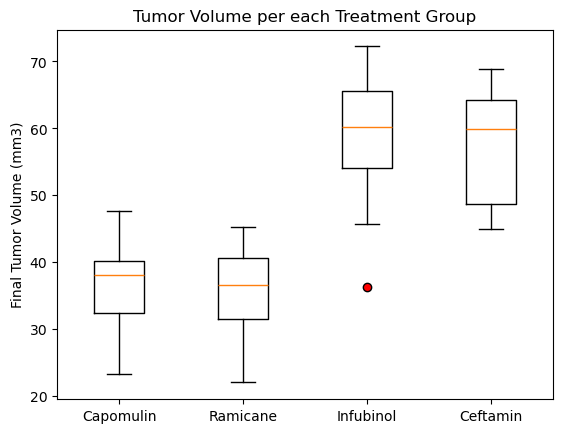

In [139]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_group = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig, ax = plt.subplots()
ax.set_title('Tumor Volume per each Treatment Group')
ax.set_ylabel('Final Tumor Volume (mm3)')
#ax.set_xlabel('Drug_Regimen')
ax.boxplot(tumor_group, labels=Drug_Regimen, widths = 0.4, vert=True, flierprops=dict(markerfacecolor='red'))
plt.savefig('boxplot')
plt.show()


## Line and Scatter Plots

In [130]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#plot_line = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "r157", :].plot(kind = "line")
line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509", :]
line_plot.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


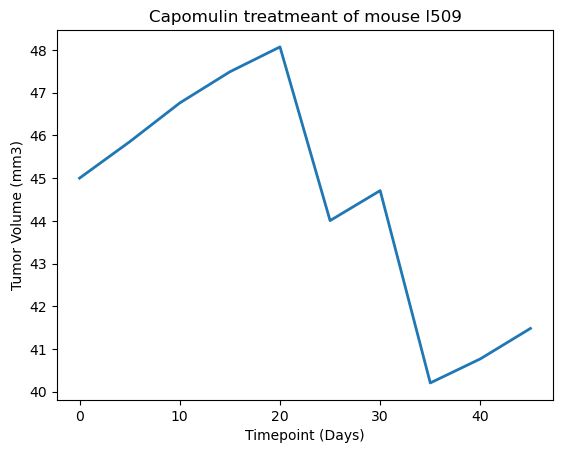

In [131]:
x_axis = line_plot["Timepoint"]
tumvol = line_plot["Tumor Volume (mm3)"]
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumvol,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig("linechart")
plt.show()


In [132]:
#Capomulin_df
#Capomulin_df.columns

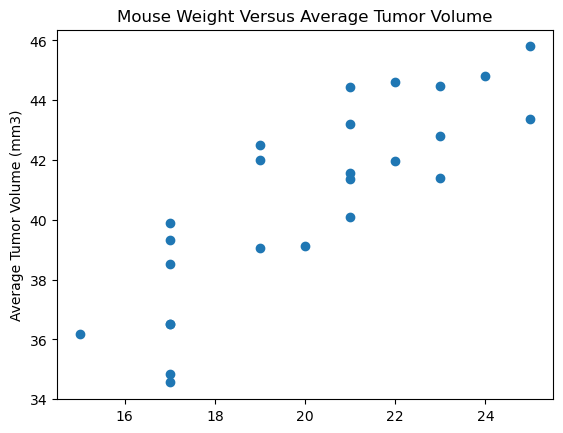

In [133]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen 

fig, ax = plt.subplots()
avgcapm = Capomulin_df.loc[Capomulin_df["Drug Regimen"] == 'Capomulin']

avgcapm_avg = avgcapm.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()
#avgcapm_avg  

plt.scatter(avgcapm_avg['Weight (g)'],avgcapm_avg['Tumor Volume (mm3)'])
#plt.scatter(Capomulin_df['Tumor Volume (mm3)'],Capomulin_df['Weight (g)'])

plt.title('Mouse Weight Versus Average Tumor Volume')
plt.ylabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [134]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st
corr = st.pearsonr(avgcapm_avg['Weight (g)'],avgcapm_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [135]:
model=st.linregress(avgcapm['Weight (g)'],avgcapm['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9609669432428368, intercept=21.48982721329954, rvalue=0.5256995552077172, pvalue=9.605446629501037e-18, stderr=0.10298279892023664, intercept_stderr=2.0751570054912993)

In [136]:
mx_slope = 0.9609669432428368
bintercept = 21.48982721329954

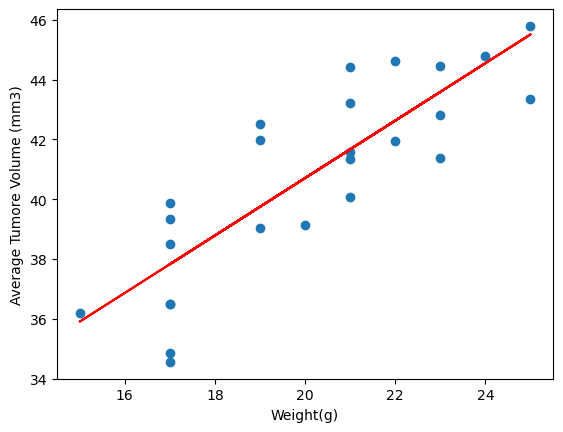

In [137]:
y_values = avgcapm_avg['Weight (g)']*mx_slope+bintercept
plt.scatter(avgcapm_avg['Weight (g)'],avgcapm_avg['Tumor Volume (mm3)'])
plt.plot(avgcapm_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()